# Schools!



To begin, I loaded the dataset containing the locations and details of public schools in Allegheny County. This dataset includes latitude and longitude coordinates for each school, which allows for spatial analysis using mapping tools like GeoPandas and Shapely. To load the dataset correctly, it was important to get the exact name that is specified in the directory and it took a while to correctly load the dataset. The tools like GeoPandas and Shapely needed to be imported into the notebook.


In [1]:
import sys
sys.path.append("/ihome/cmpinf0010_2025s/kkr33/.local/lib/python3.11/site-packages")

One of the key technical steps in this project was making sure the school coordinates (latitude and longitude) matched the format of the Pittsburgh neighborhood shapefile. The shapefile originally used a projection called EPSG:2272, which is based on feet and specific to Pennsylvania. However, the school dataset uses standard geographic coordinates (EPSG:4326), which are in degrees. In order to accurately check which neighborhood each school falls into, I had to reproject the neighborhood shapefile to EPSG:4326 so that both datasets were using the same coordinate system. Without this conversion, spatial matching wouldn't work, and schools wouldn’t be correctly assigned to neighborhoods.


In [2]:
import pandas as pd
import fpsnippets
from shapely.geometry import Point
import geopandas
schools_df = pd.read_csv('Allegheny_County_Public_Schools___Local_Education_Agency_(LEAs)_Locations.csv')

NEIGHBORHOODS = geopandas.read_file(
    "https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/pittsburghpaneighborhoods-.zip"
)
NEIGHBORHOODS = NEIGHBORHOODS.to_crs(epsg=4326)

This block of code defines a function called `geo_to_neighborhood`, which takes a latitude and longitude point and checks which Pittsburgh neighborhood it falls into using spatial geometry. It loops through each neighborhood in the shapefile and uses the `contains` method to see if the point is inside the neighborhood boundary. Once it finds a match, it returns the neighborhood name.

After defining the function, I applied it to every row in the school dataset using the latitude (`Y`) and longitude (`X`) columns. This created a new column called `"Neighborhood"` in the DataFrame. Finally, I used `value_counts()` to count how many schools were located in each neighborhood, and stored those results in a new DataFrame for visualization and analysis.


In [3]:
def geo_to_neighborhood(latitude, longitude):
    pt = Point(longitude, latitude)
    for _idx, neighborhood in NEIGHBORHOODS.iterrows():
        if neighborhood["geometry"].contains(pt):
            return neighborhood["hood"]
    return None
schools_df["Neighborhood"] = schools_df.apply(
lambda row: geo_to_neighborhood(row["Y"], row["X"]),
axis=1
)
school_counts = schools_df["Neighborhood"].value_counts().reset_index()
school_counts.columns = ["Neighborhood", "School Count"]


Here I tested if the function was mapping coordinates correctly, and it did!

In [4]:
geo_to_neighborhood(40.440624, -79.995888)

'Central Business District'

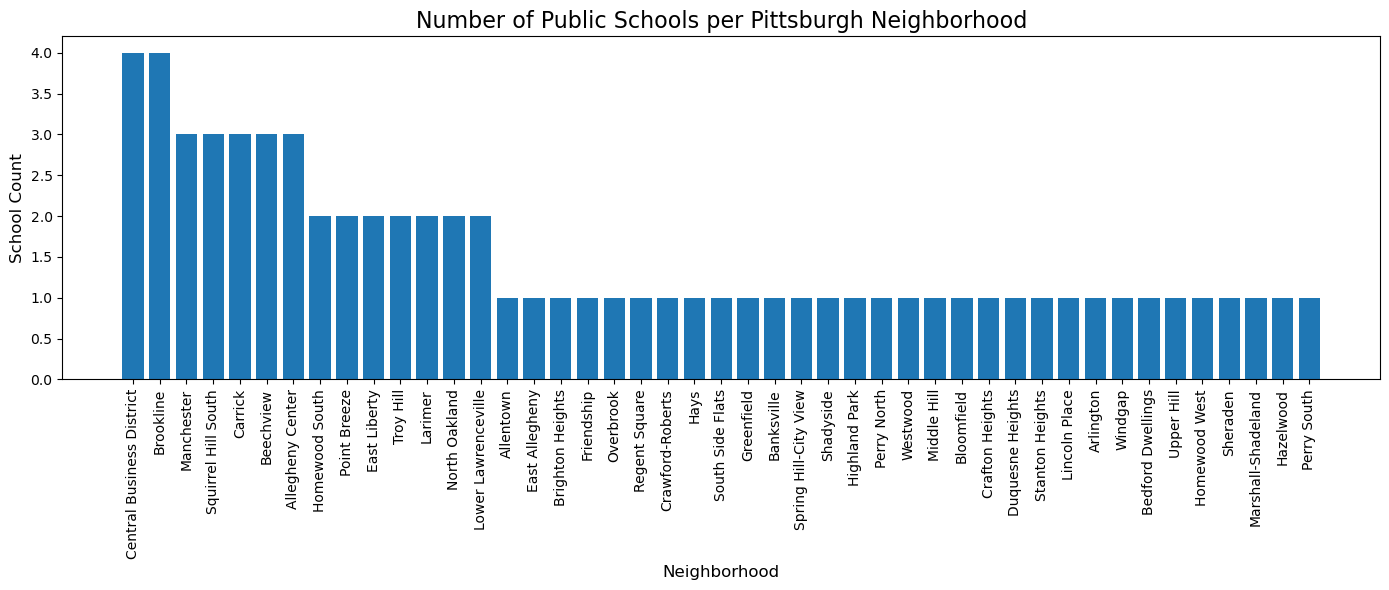

In [5]:
import matplotlib.pyplot as plt

school_counts_sorted = school_counts.sort_values(by="School Count", ascending=False)

plt.figure(figsize=(14, 6))
plt.bar(school_counts_sorted["Neighborhood"], school_counts_sorted["School Count"])
plt.title("Number of Public Schools per Pittsburgh Neighborhood", fontsize=16)
plt.xlabel("Neighborhood", fontsize=12)
plt.ylabel("School Count", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

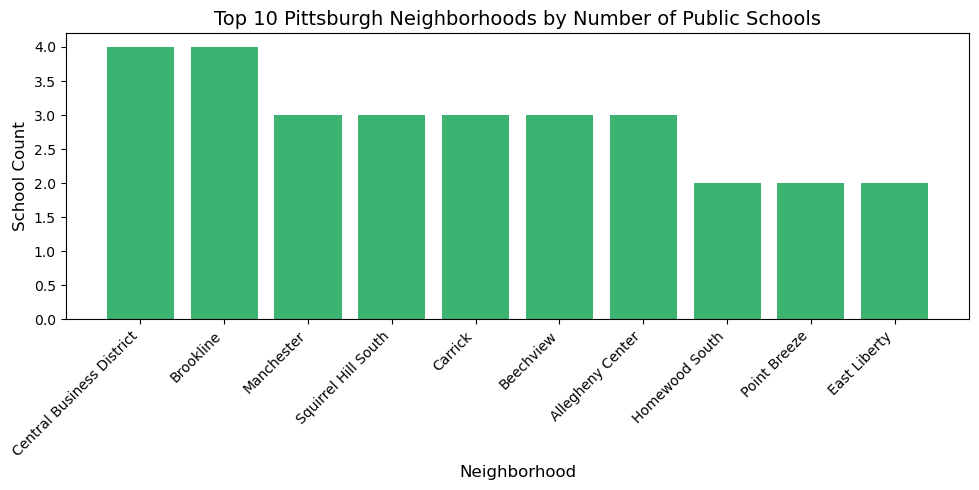

In [6]:
import matplotlib.pyplot as plt

top10 = school_counts.sort_values(by="School Count", ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.bar(top10["Neighborhood"], top10["School Count"], color="mediumseagreen")
plt.title("Top 10 Pittsburgh Neighborhoods by Number of Public Schools", fontsize=14)
plt.xlabel("Neighborhood", fontsize=12)
plt.ylabel("School Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Social Services

In [7]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import fpsnippets

In [8]:
social = pd.read_csv("socialServices.csv")
pop = pd.read_csv("neighborhood_population.csv")

<Axes: >

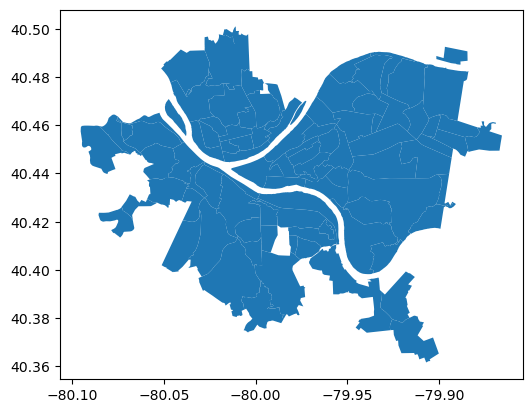

In [9]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
#neighborhoods.head(10)
neighborhoods.plot()

In [10]:
latitude = social['latitude']
longitude = social['longitude']
test = social['neighborhood']
index = 0
while index < social['neighborhood'].count():
    townName = fpsnippets.geo_to_neighborhood(float(latitude[index]), float(longitude[index]))
    if townName != 'None':
        social.loc[social['_id'] == index + 1, "neighborhood"] = townName
    index = index + 1

In [11]:
social = social.replace(["Downtown", "Uptown"], ["Central Business District", "Bluff"])
servicesNeighborhoods = social.groupby("neighborhood").count()
#print(servicesNeighborhoods)

,hood,_id,geometry
5,Central Business District,20.0,"POLYGON ((-79.99238 40.44484, -79.99233 40.444..."
16,Bluff,13.0,"POLYGON ((-79.9939 40.43893, -79.99381 40.4389..."
25,Central Northside,12.0,"POLYGON ((-80.00858 40.46004, -80.00856 40.459..."
13,South Side Flats,10.0,"POLYGON ((-79.97726 40.43274, -79.97725 40.432..."
3,Crawford-Roberts,9.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."


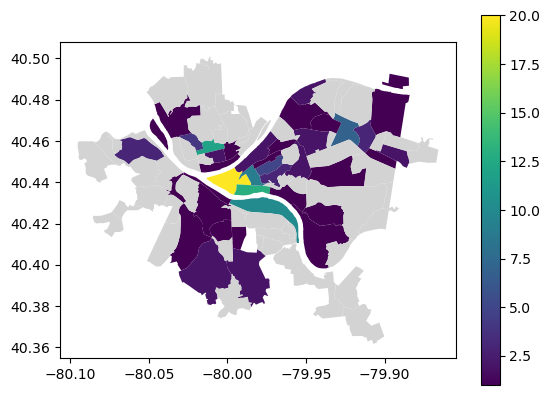

In [12]:
socialMap = neighborhoods.merge(servicesNeighborhoods, how = "left", left_on = "hood", right_on = "neighborhood")
socialMap = socialMap.sort_values(by = '_id', ascending = False)
socialMap.plot(column="_id", legend = True, missing_kwds = {'color':'lightgrey'})
socialMap[['hood', '_id', 'geometry']].head()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89]),
 [Text(0, 0, 'Central Business District'),
  Text(1, 0, 'Bluff'),
  Text(2, 0, 'Central Northside'),
  Text(3, 0, 'South Side Flats'),
  Text(4, 0, 'Crawford-Roberts'),
  Text(5, 0, 'East Liberty'),
  Text(6, 0, 'Middle Hill'),
  Text(7, 0, 'California-Kirkbride'),
  Text(8, 0, 'Sheraden'),
  Text(9, 0, 'Larimer'),
  Text(10, 0, 'Terrace Village'),
  Text(11, 0, 'Carrick'),
  Text(12, 0, 'Strip District'),
  Text(13, 0, 'North Oakland'),
  Text(14, 0, 'Bloomfield'),
  Text(15, 0, 'Upper Lawrenceville'),
  Text(16, 0, 'Homewood South'),
  Text(17, 0, 'Allegheny Center'),
  Text(18, 0,

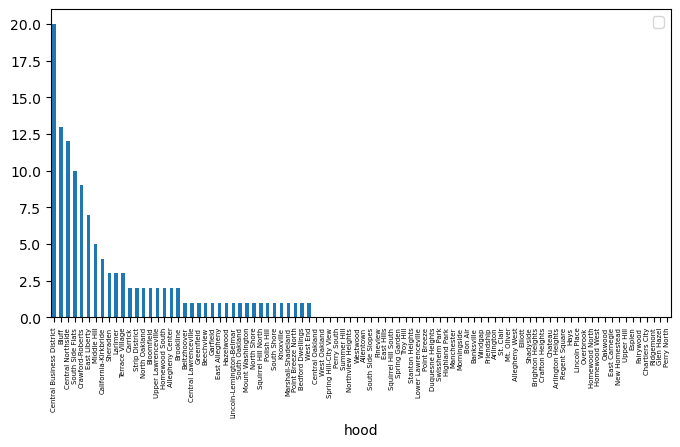

In [13]:
socialMap.plot.bar(x = "hood", y = "_id", figsize=(8,4))
plt.xticks(size = 5)

In [14]:
#merge 2020 population with socialMap
population = pop[["Neighborhood", "2020_Total_Population"]]
socialMap = socialMap.merge(population, how = 'left', left_on = "hood", right_on = 'Neighborhood')

In [15]:
#normalize data
socialMap['servicePerPerson'] = socialMap['_id']/socialMap['2020_Total_Population']
socialMap['normalize'] = (socialMap['servicePerPerson']-socialMap['servicePerPerson'].min())/(socialMap['servicePerPerson'].max()-socialMap['servicePerPerson'].min())
socialMap['normalize'] = socialMap['normalize'] * 100
socialMap[['hood', '_id', 'normalize', '2020_Total_Population', 'servicePerPerson']].head(20)

,hood,_id,normalize,2020_Total_Population,servicePerPerson
0,Central Business District,20.0,NaN,NaN,NaN
1,Bluff,13.0,6.180344,5882.0,0.002210
2,Central Northside,12.0,11.493217,2972.0,0.004038
3,South Side Flats,10.0,3.648534,7467.0,0.001339
4,Crawford-Roberts,9.0,11.165598,2293.0,0.003925
5,East Liberty,7.0,3.044377,6187.0,0.001131
6,Middle Hill,5.0,8.028174,1757.0,0.002846
7,California-Kirkbride,4.0,16.156386,709.0,0.005642
8,Sheraden,3.0,1.449716,5147.0,0.000583
9,Larimer,3.0,5.400123,1545.0,0.001942


<Axes: xlabel='hood'>

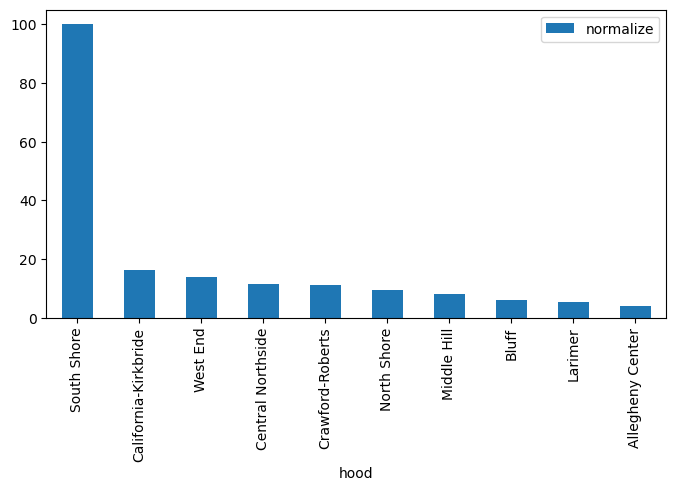

In [16]:
sorted = socialMap.sort_values(by = 'servicePerPerson', ascending = False)
sorted.iloc[0:10].plot(kind = 'bar', x = "hood", y = "normalize", figsize=(8,4))

In [17]:
sorted[['hood', 'normalize']].head()

,hood,normalize
32,South Shore,100.000000
7,California-Kirkbride,16.156386
37,West End,13.936235
2,Central Northside,11.493217
4,Crawford-Roberts,11.165598


# Parks

In [18]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


df = pd.read_csv('Data/parks_dataset.csv')

df.head()

,_id,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,2,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,3,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
3,4,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
4,5,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907


In [19]:
df_neighborhood = df.groupby('neighborhood').agg(
    total_parks=('name', 'count'))

df_neighborhood.reset_index(inplace=True)
df_neighborhood.sort_values('total_parks', ascending=False, inplace=True)
df_neighborhood

,neighborhood,total_parks
22,East Liberty,12
13,Central Business District,10
5,Beechview,8
57,South Side Slopes,7
50,Point Breeze,7
...,...,...
9,Bon Air,1
14,Central Lawrenceville,1
60,Squirrel Hill North,1
62,Stanton Heights,1


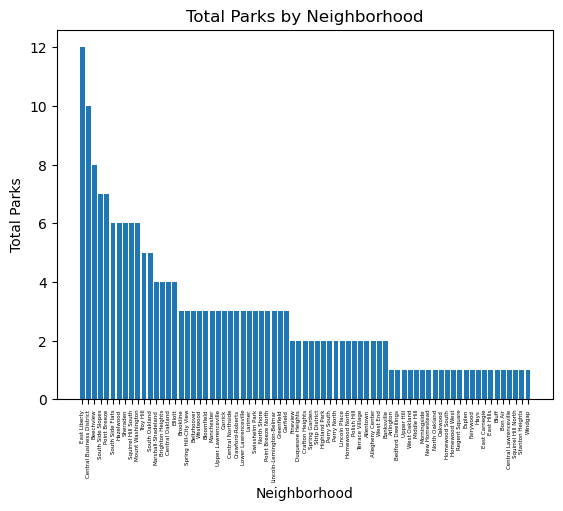

In [20]:
neighborhoods = df_neighborhood['neighborhood']
total_parks = df_neighborhood['total_parks'].values

plt.bar(neighborhoods, total_parks)
plt.title('Total Parks by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Total Parks')
plt.xticks(rotation=90, fontsize = 4)
plt.show()

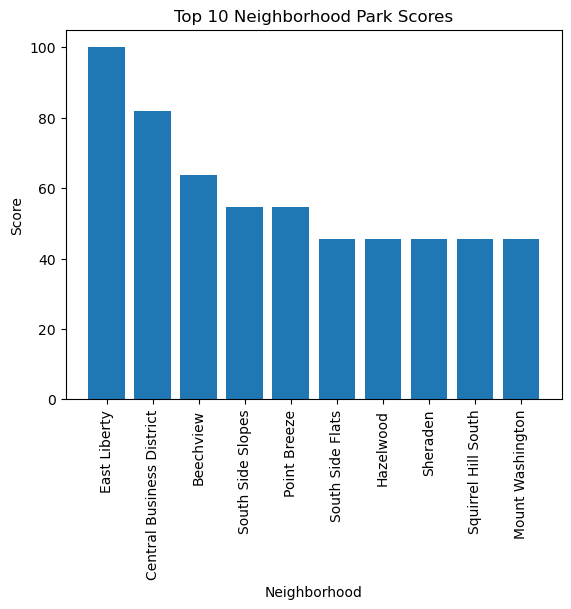

In [21]:
df_neighborhood['normalized'] = (df_neighborhood['total_parks'] - df_neighborhood['total_parks'].min()) / (df_neighborhood['total_parks'].max() - df_neighborhood['total_parks'].min())
df_neighborhood['normalized'] = df_neighborhood['normalized'] * 100
df_neighborhood.sort_values('normalized', ascending=False, inplace=True)
df_neighborhood.head()

plt.bar(neighborhoods[:10], df_neighborhood['normalized'][:10])
plt.title('Top 10 Neighborhood Park Scores')
plt.xlabel('Neighborhood')
plt.ylabel('Score')
plt.xticks(rotation=90, fontsize = 10)
plt.show()

# Combining the Data

In the schools dataset, not every Pittsburgh neighborhood had a school so there were missing values when the data was merged. The missing neighborhoods were inserted here to avoid this and make sure every Pittsburgh neighborhood was taken into account.

In [ ]:
tempHood = pd.DataFrame(socialMap['hood'])
emptyMerge = tempHood.merge(school_counts_sorted, how = 'outer', left_on = 'hood', right_on = 'Neighborhood')
emptyMergeFinal = emptyMerge[0:90]
#print(emptyMergeFinal)

Then, we merged the data on the neighborhoods and added up their scores.

In [61]:
schoolScore = emptyMergeFinal[["hood", "School Count"]]
serviceScore = socialMap[['hood', 'normalize']]
parkScore = df_neighborhood[['neighborhood', 'normalized']]

merge1 = schoolScore.merge(serviceScore, how = 'left', left_on = 'hood', right_on = 'hood')
mergeFinal = merge1.merge(parkScore, how = 'left', left_on = "hood", right_on = 'neighborhood')


mergeFinal['School Count'] = mergeFinal['School Count'].fillna(0)
mergeFinal['normalize'] = mergeFinal['normalize'].fillna(0)
mergeFinal['normalized'] = mergeFinal['normalized'].fillna(0)
print(mergeFinal)

mergeFinal['finalScore'] = mergeFinal['School Count'] + mergeFinal['normalize'] + mergeFinal['normalized']

#print(mergeFinal['finalScore'])

                         hood  School Count  normalize  \
0   Central Business District           4.0   0.000000   
1                       Bluff           0.0   6.180344   
2           Central Northside           0.0  11.493217   
3            South Side Flats           1.0   3.648534   
4            Crawford-Roberts           1.0  11.165598   
..                        ...           ...        ...   
85                  Fairywood           0.0   0.000000   
86             Chartiers City           0.0   0.000000   
87                  Ridgemont           0.0   0.000000   
88                 Glen Hazel           0.0   0.000000   
89                Perry North           1.0   0.000000   

                 neighborhood  normalized  
0   Central Business District   81.818182  
1                       Bluff    0.000000  
2           Central Northside   18.181818  
3            South Side Flats   45.454545  
4            Crawford-Roberts   18.181818  
..                        ...         .

These are the top 5 neighborhoods' scores and a graph of the top 10 neighborhoods.

In [62]:
mergeFinal.sort_values('finalScore', ascending = False, inplace = True)
print(mergeFinal)
mergeFinal[['hood', 'finalScore']].head()

                         hood  School Count   normalize  \
5                East Liberty           2.0    3.044377   
32                South Shore           0.0  100.000000   
0   Central Business District           4.0    0.000000   
22                  Beechview           3.0    0.137988   
54               Point Breeze           2.0    0.000000   
..                        ...           ...         ...   
67             Allegheny West           0.0    0.000000   
65                  St. Clair           0.0    0.000000   
72                    Chateau           0.0    0.000000   
66                 Mt. Oliver           0.0    0.000000   
88                 Glen Hazel           0.0    0.000000   

                 neighborhood  normalized  finalScore  
5                East Liberty  100.000000  105.044377  
32                        NaN    0.000000  100.000000  
0   Central Business District   81.818182   85.818182  
22                  Beechview   63.636364   66.774352  
54         

,hood,finalScore
5,East Liberty,105.044377
32,South Shore,100.000000
0,Central Business District,85.818182
22,Beechview,66.774352
54,Point Breeze,56.545455


<Axes: xlabel='hood'>

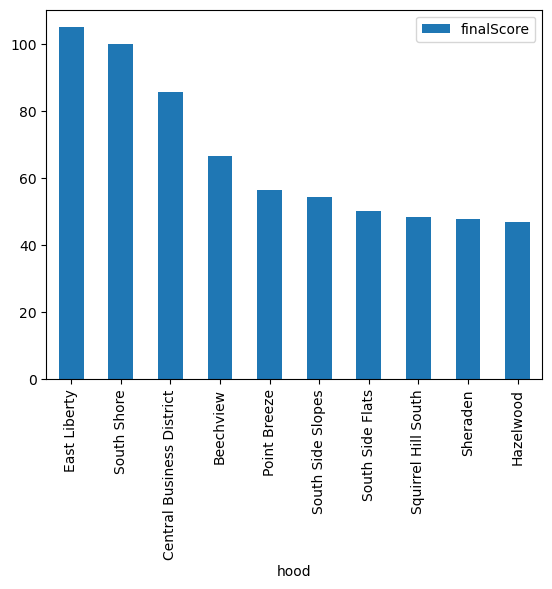

In [64]:
mergeFinal.iloc[0:10].plot(kind = 'bar', x = 'hood', y = 'finalScore')